# CNN (convolutional neural network)
## 7.1 전체 구조
합성곱 계층 + 풀링 계층을 레고처럼 조립하여 만드는 신경망
합성곱 계층 : convolutional layer
풀링 계층   : pooling layer

이때까지 본 신경망은 fully-connected인 계층인 affine 계층으로 구현되어 있다.


<다른 점>
Affine - ReLU              # 일반적 신경망
       ↓ 
Conv   - ReLU - (Pooling)  # CNN

<같은 점>
1. 출력에 가까운 층은 Affine - ReLU 유지
2. 마지막 출력 계층 Affine - Softmax 유지



## 7.2 합성곱 계층
### 7.2.1 완전연결 계층의 문제점
완전연결 계층은 3차원 이미지를 1차원으로 입력받아야 해서 씹히는 정보가 있다.
그러나 CNN은 3차원을 3차원으로 받고 3차원으로 출력한다.

CNN에서는 합성곱 계층 (Conv)의 입출력 데이터를 특징 맵(feature map)이라고 한다.
입력 특징 맵은 input feature map, 출력 특징 맵은 output feature map이라고 한다.

### 7.2.2 합성곱 연산
합성곱 연산은 <b>이미지 처리에서 말하는 필터(=커널) 연산</b>과 같다.
fused multiply-add, FMA
(도장찍기 개념으로 이해하면 매우 편리함)

### 7.2.3 패딩
패딩이란?

입력 데이터 주변을 0같은 특정 값으로 채우는 행위

왜 쓰냐?

(4, 4) 입력 데이터에 (3, 3) 필터를 씌우면 (2, 2)의 결과가 나오므로 합성곱 연산을 반복할 수 없음.
근데 패딩 1 씌우면 (4, 4) 그대로 나오게 되므로 합성곱 연산을 써먹을 수 있다.

### 7.2.4 스트라이드
도장을 2칸씩 옮겨서 쾅쾅.
스트라이드 키우면 출력 크기가 작아짐.

출력크기는 패딩과 스트라이드에 관계있고 식이 정해져있다 p234

### 7.2.5 3차원 데이터의 합성곱 연산
채널까지 고려하여 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고 그 결과를 <b>더해서</b> 하나의 출력을 얻는다.

<주의할 점>
필터의 채널 수는 입력 데이터의 채널 수와 같도록 설정해야 한다.

### 7.2.6 블록으로 생각하기

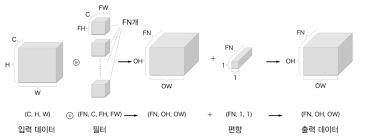

(편향을 구할 땐 넘파이의 브로드캐스트 기능 활용)

### 7.2.7 배치 처리
배치처리를 고려하여
(채널수, 높이, 너비) -> (데이터수, 채널수, 높이, 너비)의 형태로 데이터를 저장한다.


## 7.3 풀링 계층

풀링은 세로, 가로 방향의 공간을 줄이는 연산이다.
예를 들면 최대 풀링은 도장 내에서 최대값만 꺼내는 행위다.
풀링은 최대 풀링(max pooling), 평균 풀링(average pooling) 등이 있으며 이미지 인식 분야에서는 max pooling을 사용한다.

### 7.3.1 풀링 계층의 특징

1. 단순히 최댓값, 평균을 구하는 처리이므로 학습해야 할 매개변수가 없다.
2. 풀링은 채널 수를 바꾸지 않는다.
3. 입력의 변화가 있어도 출력은 잘 안 바뀐다.(강건하다)

## 7.4 합성곱/풀링 계층 구현하기
4차원이라 어렵지만 꼼수가 있다.


In [1]:
import numpy as np
x = np.random.rand(10, 1, 28, 28) #(데이터수, 채널, 높이, 너비)
print(x.shape)    # (10, 1, 28, 28)
print(x[0].shape) # (1, 28, 28)
print(x[1].shape) # (1, 28, 28)

# 첫 번째 데이터의 첫 채널의 공간 데이터 (28,28)를 접근하려면
print(x[0,0]) # 또는 x[0][0]



(10, 1, 28, 28)
(1, 28, 28)
(1, 28, 28)
[[5.94879298e-01 2.07734259e-02 1.50355981e-01 3.17461611e-01
  4.12687683e-01 6.24083989e-01 2.67276921e-01 7.69062543e-01
  6.95296177e-01 2.10024116e-01 6.82398234e-01 2.10507149e-01
  7.45863733e-01 8.68089483e-01 7.28765448e-02 5.17027827e-01
  8.55947899e-01 4.66214800e-02 7.35327693e-01 6.55910004e-01
  2.46976490e-01 4.70978460e-01 6.56827784e-02 1.51521630e-01
  8.05911783e-01 2.54470944e-01 2.82085284e-01 5.11540756e-01]
 [4.95189152e-02 1.12445867e-01 2.05735098e-02 2.86012282e-01
  4.18785378e-01 5.26981757e-01 1.17924424e-01 8.56656293e-02
  9.66531963e-01 1.08978362e-01 9.11666893e-01 3.78359399e-01
  9.02890838e-01 3.51470003e-01 9.81433101e-01 4.74026533e-01
  7.58506514e-01 3.58893755e-01 2.99651026e-03 2.29772159e-01
  3.56620422e-01 9.95825120e-01 9.76804387e-01 1.56591260e-01
  6.84237467e-01 1.38075466e-01 2.71776190e-01 9.79970317e-02]
 [6.32104685e-01 4.16751167e-01 7.26951344e-01 8.55998762e-01
  4.46090792e-01 9.94130126e

In [ ]:
import sys, os
sys.path.append(os.pairdir)
from common.util import im2col

x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1, 5, 5, stride =1, pad=0) #
print(col1.shape) # (9, 75) # 3*5*5 = 75, 필터의 크기

